# 0 - Analyzing Datasets from project using Regression algorithms

* Author> Pedro Ciancaglini
* EY Badge> Artificial Intelligence Bronze

## Main objective of this analysis:

* Understand the correlation between current variables (Dependant and independant)
* Test machine learning algorithms with SP as target
* Measure performance of each algorithm
* Compare performance and conclude  

# 1 - Preparing Notebook for Analysis

In [83]:
# importing required libraries for this notebook
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Importing library and connecting to cloud drive to access to datasets
from google.colab import drive
drive.mount('/content/drive')
working_directory = '/content/drive/MyDrive/Colab Notebooks/98.COB/DS_v0/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2 - Multi-Linear Analysis

Considering this dataset with many independent variables, this section will test who Multi-linear analysis will perform with all variables

In [85]:
# Importing the dataset
train_df_MLR = pd.read_csv(working_directory + 'Train_26_8.csv')
results_df_MLR = pd.read_csv(working_directory + 'Results_26_8.csv')
results_test_MLR = pd.read_csv(working_directory + 'Results_26_8.csv')

pd.options.display.float_format = '{:,.2f}'.format # Setting float format to 2 decimals

# Spliting dataset into independent variable (X) and dependent variable (y)
X_MLR = train_df_MLR.iloc[:, :-1].values
y_MLR = train_df_MLR.iloc[:, -1].values


In [86]:
# Explaining Dataset
# IP_ML is the iteration path of the business requirement. 11 corresponds to Q1 Sprint 1. Qs from 1 to 4. Sprints from 1 to 6
# QA is a binary column which represents if the business requirement requires additional Quality Assurance Testing (1) or not (2)
# ENG is a binary column which represents if the business requirement requires Engineering (1) or not (0)
# TechDebt is a binary column representing if the business requirement is a technical debt (1) or not (0)
# ID_Area is the project classification. In the product, there are 5 workstreams/projects/areas. 5 represents management, and from 1 to 4, each project
# ID_Type is the work classification. Each business requirement requires a type of work to be done. (1) Development, (2) Deployment (3) Research
# SP stands for Story Points, the amount of effort required for each business requirement. 
#       In waterfall projects, this estimation is usally provided by the project manager in hours. 
#       In Agile, the estimation is performed by the development team during refinements. Architects and leaders estimate business requirements during creation. 
#                 Development team finally concludes based on their understanding and skills to solve the business requirement
train_df_MLR.head()

,IP_ML,QA,ENG,TechDebt,ID_Area,ID_Type,SP
0,11,0,0,0,5,1,0
1,11,0,0,0,5,3,0
2,11,0,0,0,5,4,0
3,11,0,0,0,5,5,0
4,11,0,0,0,5,11,0


In [87]:
# importing Required Libraries for this section
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [88]:
X_constant = sm.add_constant(X_MLR) # Inserting constant using statsmodel to analyze multilinearity  between variables

In [89]:
# Visualizing how constant was created in the column 0
pd.DataFrame(X_constant)

,0,1,2,3,4,5,6
0,1.00,11.00,0.00,0.00,0.00,5.00,1.00
1,1.00,11.00,0.00,0.00,0.00,5.00,3.00
2,1.00,11.00,0.00,0.00,0.00,5.00,4.00
3,1.00,11.00,0.00,0.00,0.00,5.00,5.00
4,1.00,11.00,0.00,0.00,0.00,5.00,11.00
...,...,...,...,...,...,...,...
538,1.00,46.00,1.00,1.00,0.00,3.00,7.00
539,1.00,46.00,1.00,1.00,0.00,3.00,9.00
540,1.00,46.00,0.00,1.00,0.00,4.00,5.00
541,1.00,46.00,1.00,1.00,0.00,1.00,1.00


In [90]:
# Getting help to analyze how to implement model using sm.OLS (Ordinary Least Squares)
sm.OLS?

In [91]:
# Running the first model OLS
model = sm.OLS(y_MLR, X_constant)

In [92]:
# Fitting the model 
lr = model.fit()

## a. Data analaysis after regression is applied

In [93]:
# Analyzing results of multilinearity correlation between variables. 
# Similar to the previous notebook, correlation is poor with the current variables
# Coef column represents the coefficient of correlation between variables. 
# Coef > 0.5 is good correlation
# Coef < 0.5 is poor correlation

# Covariance indicates how strong is correlation between variables. In this case> Non Robust. 
# Coef is the residuals between independent and dependent variables using the constant as the target function
# Residuals are the difference between the observation (independent and dependent variable, or y = mx + b)

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     7.547
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           8.75e-08
Time:                        20:21:44   Log-Likelihood:                -1351.7
No. Observations:                 543   AIC:                             2717.
Df Residuals:                     536   BIC:                             2747.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7280      0.643      4.244      0.000       1.465       3.991
x1            -0.0121      0.010     -1.232      0.218      -0.031       0.007
x2             0.8898      0.263      3.379      0.001       0.373       1.407
x3             1.2019      0.265      4.534      0.000       0.681       1.723
x4             0.5822      0.671      0.867      0.386      -0.737       1.901
x5             0.0519      0.102      0.508      0.612      -0.149       0.253
x6             0.0346      0.045      0.764      0.445      -0.054       0.124
==============================================================================
Omnibus:                       64.832   Durbin-Watson:                   0.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.140
Skew:                           0.899   Prob(JB):                     1.97e-19
Kurtosis:                       3.760   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Refreshing columns names to include in the model
train_df_MLR.columns

Index(['IP_ML', 'QA', 'ENG', 'TechDebt', 'ID_Area', 'ID_Type', 'SP'], dtype='object')

In [95]:
# Training OLS model using all independent variables
# smf allow model to be trained selecting the independent variables. 
# sm trains the model with all variables 
form_lr = smf.ols(formula = 'y_MLR ~ IP_ML + QA + ENG + TechDebt + ID_Area + ID_Type', data=train_df_MLR)
mlr = form_lr.fit()

In [96]:
# Analyzing results of OLS based on dataset columns without constant
# Detecting strong correlation between ENG, QA and TechDebt. 
# Week correlation with the Iteration Path. 
#     This confirms hypothesis that independently on the moment of the year or month 
#     where the business requierement is being developed, effort is consistently the same 
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_MLR   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     7.547
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           8.75e-08
Time:                        20:21:45   Log-Likelihood:                -1351.7
No. Observations:                 543   AIC:                             2717.
Df Residuals:                     536   BIC:                             2747.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7280      0.643      4.244      0.000       1.465       3.991
IP_ML         -0.0121      0.010     -1.232      0.218      -0.031       0.007
QA             0.8898      0.263      3.379      0.001       0.373       1.407
ENG            1.2019      0.265      4.534      0.000       0.681       1.723
TechDebt       0.5822      0.671      0.867      0.386      -0.737       1.901
ID_Area        0.0519      0.102      0.508      0.612      -0.149       0.253
ID_Type        0.0346      0.045      0.764      0.445      -0.054       0.124
==============================================================================
Omnibus:                       64.832   Durbin-Watson:                   0.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.140
Skew:                           0.899   Prob(JB):                     1.97e-19
Kurtosis:                       3.760   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Training model removing some independent variables with low linear correlation
# Removing independent variables with low linear correlation can improve the model
form_lr = smf.ols(formula = 'y_MLR ~ QA + ENG + TechDebt',  data=train_df_MLR)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_MLR   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     14.00
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           8.40e-09
Time:                        20:21:45   Log-Likelihood:                -1353.3
No. Observations:                 543   AIC:                             2715.
Df Residuals:                     539   BIC:                             2732.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7123      0.229     11.832      0.000       2.262       3.163
QA             0.9129      0.260      3.506      0.000       0.401       1.424
ENG            1.1765      0.260      4.529      0.000       0.666       1.687
TechDebt       0.6454      0.643      1.004      0.316      -0.618       1.909
==============================================================================
Omnibus:                       69.149   Durbin-Watson:                   0.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.921
Skew:                           0.933   Prob(JB):                     4.03e-21
Kurtosis:                       3.820   Cond. No.                         6.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## b. Analyzing using correlation matrix

In [98]:
# Analyzing multicolliniarity using a correlation matrix. 
# We need to find troublemakers. 
# Values grather than 0.6 will cause multicolliniarity in our model

pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = train_df_MLR.corr()
corr_matrix

,IP_ML,QA,ENG,TechDebt,ID_Area,ID_Type,SP
IP_ML,1.00,-0.01,-0.02,-0.19,-0.29,-0.04,-0.08
QA,-0.01,1.00,0.18,-0.02,-0.09,0.14,0.18
ENG,-0.02,0.18,1.00,0.11,-0.21,0.03,0.22
TechDebt,-0.19,-0.02,0.11,1.00,-0.13,-0.12,0.06
ID_Area,-0.29,-0.09,-0.21,-0.13,1.00,0.07,-0.02
ID_Type,-0.04,0.14,0.03,-0.12,0.07,1.00,0.06
SP,-0.08,0.18,0.22,0.06,-0.02,0.06,1.00


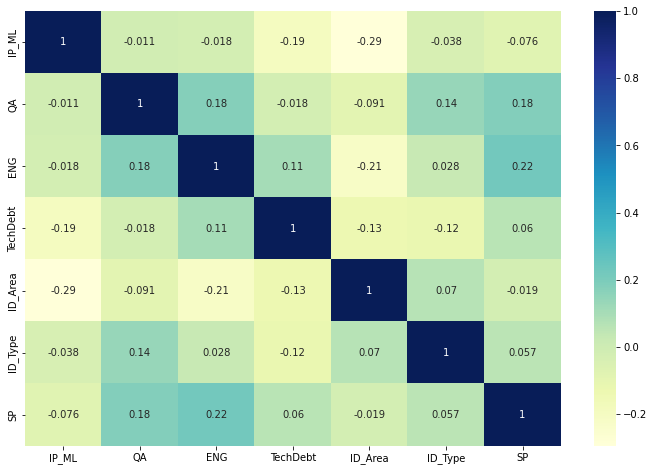

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

## c. Analyzing collinearity

In [100]:
# Detecting Collinearity with Eigenvectors

eigenvalues, eigenvectors = np.linalg.eig(train_df_MLR.corr())
pd.options.display.float_format = '{:,.4f}'.format
pd.Series(eigenvalues).sort_values()

3   0.5526
5   0.7356
6   0.7908
4   0.8626
2   1.2205
1   1.3245
0   1.5134
dtype: float64

Small value represents presence of **collinearity**. In this case, index 3, 5, 6 are the smallest agaist the others

In [101]:
print(train_df_MLR.columns[3], train_df_MLR.columns[5],train_df_MLR.columns[6])

TechDebt ID_Type SP


In [102]:
np.abs(pd.Series(eigenvectors[:,6])).sort_values(ascending=False) # Detecting using large vectors

1   0.7997
5   0.4200
2   0.3270
6   0.2630
0   0.0758
4   0.0409
3   0.0257
dtype: float64

Note that index 1 and 5 have very high loading when compared against the rest

In [103]:
print(train_df_MLR.columns[1], train_df_MLR.columns[5])

QA ID_Type


**Conclusion**

**good news>** In the colliniarity analysis, there are no independent variables with high level of collinearity. Another interesting conclusion is that ID_Type (Type of work, in this case, Research, validation, Deployment, Implementation, Testing) is highly correlated with SP (the quantity of effort to perform that task)

**bad news>** the correlation between independent and dependent variables is weak. 

# 3 - Revisiting Features Analysis

## a. Quick Data Refresher

In [104]:
train_df_MLR.head()

,IP_ML,QA,ENG,TechDebt,ID_Area,ID_Type,SP
0,11,0,0,0,5,1,0
1,11,0,0,0,5,3,0
2,11,0,0,0,5,4,0
3,11,0,0,0,5,5,0
4,11,0,0,0,5,11,0


(array([312.,  19.,  23.,  25.,  49.,  22.,  48.,   1.,  22.,  22.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

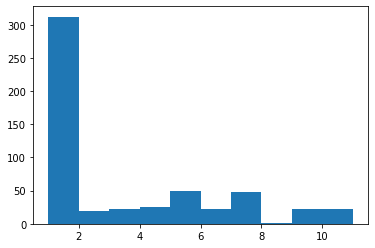

In [105]:
# Using histogram, we can see how Types are distributed. 
# There is a clear unnormal distribution. most of observations are between 0 and 1. 
plt.hist(train_df_MLR['ID_Type'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f847c703150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f847c757510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f847c6ef5d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f847c6b4290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f847c7575d0>,
  <matplotlib.lines.Line2D at 0x7f847c757950>]}

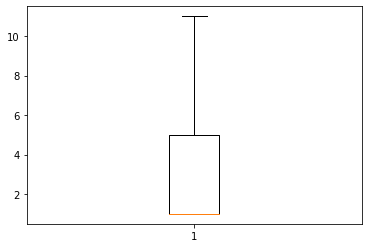

In [106]:
# With Boxplots, we can understand the percentiles of the distribution. 
# In this case, the 75% of the types are located between 0 and 5.
# Only 25% represents types between 6 to 11, becoming rare
plt.boxplot(train_df_MLR['ID_Type'])

In [107]:
train_df_MLR['ID_Type'].describe()

count   543.0000
mean      3.0571
std       2.8418
min       1.0000
25%       1.0000
50%       1.0000
75%       5.0000
max      11.0000
Name: ID_Type, dtype: float64

## b. Standardize Variables to identify Key Features

### Correlation can also be analyzed using a Linear Regression. 


In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
model = LinearRegression()
model.fit(X_MLR, y_MLR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
result_lr_MLR = pd.DataFrame(list(zip(model.coef_, train_df_MLR.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result_lr_MLR).sort_values(by='coefficient', ascending=False)

,coefficient
name,
ENG,1.2019
QA,0.8898
TechDebt,0.5822
ID_Area,0.0519
ID_Type,0.0346
IP_ML,0.0121


Same coefficients comparing with previous analysis, image down below.
 

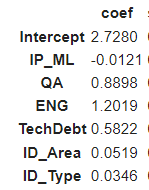

**conclusion**

* ENG, QA and TechDebt have better coefficients then other variables. This represents that when running an algorithm, the dependent variable will be directly affected by those 3, rather than the other. 

* In future analysis, we will try to expose how QA is better estimating than ENG. 

## c. Analyzing features using $R^2$

* Compare $R^2$ of model against $R^2$ of model without a feature. 

* A significant change in $R^2$ signify the importance of the feature.

In [111]:
linear_reg = smf.ols(formula = 'SP ~ IP_ML + QA + ENG + TechDebt + ID_Area + ID_Type', data=train_df_MLR)
benchmark = linear_reg.fit()
r2_score(y_MLR, benchmark.predict(train_df_MLR))

0.07789942053733001

In [112]:
linear_reg = smf.ols(formula = 'SP ~ QA + ENG + TechDebt + ID_Area ', data=train_df_MLR)
benchmark = linear_reg.fit()
r2_score(y_MLR, benchmark.predict(train_df_MLR))

0.07415184861970892

In [113]:
linear_reg = smf.ols(formula = 'SP ~ IP_ML + TechDebt + ID_Area + ID_Type', data=train_df_MLR)
benchmark = linear_reg.fit()
r2_score(y_MLR, benchmark.predict(train_df_MLR))

0.0128379395073277

In [114]:
linear_reg = smf.ols(formula = 'SP ~ IP_ML + QA + ENG + ID_Area + ID_Type', data=train_df_MLR)
benchmark = linear_reg.fit()
r2_score(y_MLR, benchmark.predict(train_df_MLR))

0.07660561245694242

In [115]:
linear_reg = smf.ols(formula = 'SP ~ IP_ML + ID_Area + ID_Type', data=train_df_MLR)
benchmark = linear_reg.fit()
r2_score(y_MLR, benchmark.predict(train_df_MLR))

0.010783048474123147

In [116]:
linear_reg = smf.ols(formula = 'SP ~  ID_Area + ID_Type', data=train_df_MLR)
benchmark = linear_reg.fit()
r2_score(y_MLR, benchmark.predict(train_df_MLR))

0.0037375407983973874

### CONCLUSION: 

* Removing features increase or decrease R2 Score
* Featrues removed can improve importance of other independepent variables
* Removing or leaving features can improve or reduce the importance of independent variables. 

It's important to  measure all combinations

# 4 - Classification Algorithms with regressors

Algorithms to use:
* Decision Tree Regressor
* Random Forest Regressor
* AdaBoost

Classification algorithms can be used as regressors. The decisions are based on values in each axis. 

The following example ilustrates how the decision tree split the observations based on a combination of values with X1 and X2. 

Random Forest and AdaBoost are ENSEMBLE algorithms, which means that there is a combination of other algorithms to improve the performance of the algorithm. 

For example, a Random Forest will use various decision Trees to conclude on a prediction. 

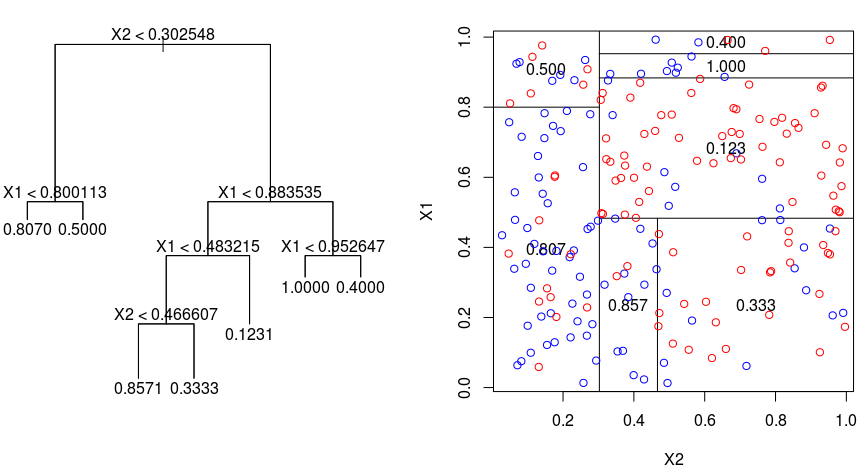

## a. Decision Tree



In [117]:
from sklearn.tree import DecisionTreeRegressor

In [129]:
# Importing the dataset
df_train_DT = pd.read_csv(working_directory + 'Train_26_8.csv')
df_results_DT = pd.read_csv(working_directory + 'Results_26_8.csv')
df_test_DT = pd.read_csv(working_directory + 'Results_26_8.csv')

pd.options.display.float_format = '{:,.2f}'.format # Setting float format to 2 decimals

X_DT_Graph = df_train_DT[['IP_ML']].values
X_DT = df_train_DT.iloc[:, :-1].values
y_DT = df_train_DT.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X_DT, y_DT, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [137]:
tree = DecisionTreeRegressor(max_depth=5)
tree_graph = DecisionTreeRegressor(max_depth=5)

In [145]:
tree.fit(X_DT, y_DT)
tree_graph.fit(X_DT_Graph, y_DT)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [146]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [147]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.6438, test: -0.4634


In [148]:
sort_idx = X_DT_Graph.flatten().argsort()

#### Plotting for analysis

In classification algorithms, even if we are using them for regression problems, there is a common scatterplot to visually check the performance of the algorithm. 

In the following figure, it is ilustrated a decision tree. The intention is to cross almost all observations with the line created by the algorithm (Prediction)



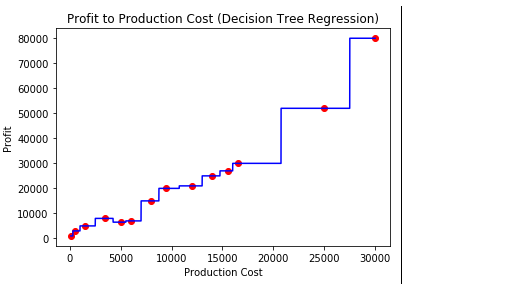

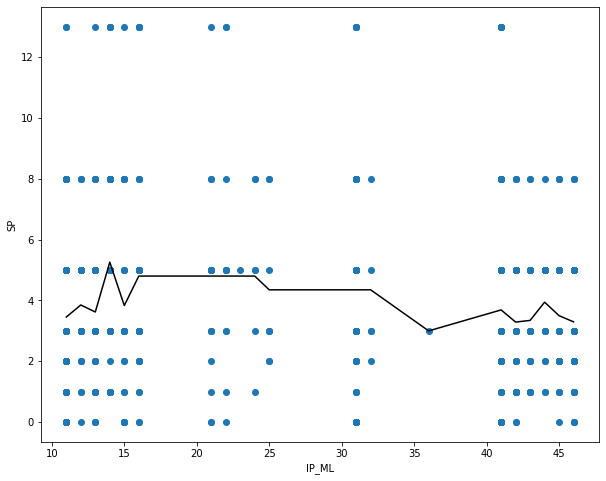

In [149]:
# creating scatterplot with dataset, using columns IP_ML and SP to analyze how decision tree works with this two variables. 
plt.figure(figsize=(10,8))
plt.scatter(X_DT_Graph[sort_idx], y_DT[sort_idx])
plt.plot(X_DT_Graph[sort_idx], tree_graph.predict(X_DT_Graph[sort_idx]), color='k')

plt.xlabel('IP_ML')
plt.ylabel('SP');

In [150]:
df_train_DT.columns

Index(['IP_ML', 'QA', 'ENG', 'TechDebt', 'ID_Area', 'ID_Type', 'SP'], dtype='object')

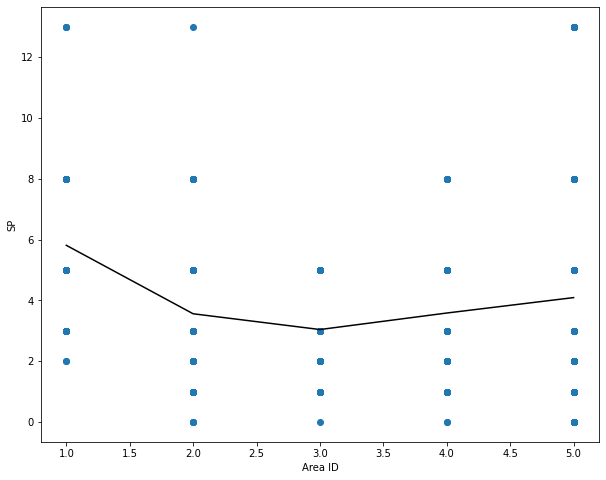

In [151]:
X_DT = df_train_DT[['ID_Area']].values
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_DT, y_DT)
sort_idx = X_DT.flatten().argsort()


# Scatterplot of Areas and SP
plt.figure(figsize=(10,8))
plt.scatter(X_DT[sort_idx], y_DT[sort_idx])
plt.plot(X_DT[sort_idx], tree.predict(X_DT[sort_idx]), color='k')

plt.xlabel('Area ID')
plt.ylabel('SP');

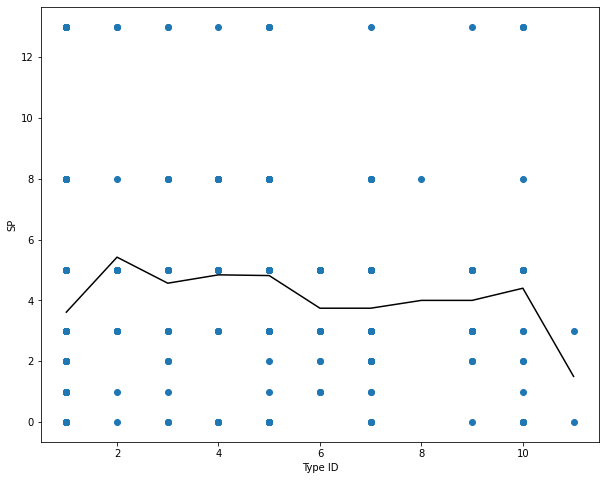

In [152]:
X_DT = df_train_DT[['ID_Type']].values
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_DT, y_DT)
sort_idx = X_DT.flatten().argsort()


# Scatterplot of Type of work and SP 
plt.figure(figsize=(10,8))
plt.scatter(X_DT[sort_idx], y_DT[sort_idx])
plt.plot(X_DT[sort_idx], tree.predict(X_DT[sort_idx]), color='k')

plt.xlabel('Type ID')
plt.ylabel('SP');

### CONCLUSION

Scatterplot using different variables, shows how prediction using these variables will perform an inaccurate prediction. This also demostrates the weak correlation between independent and dependent variables. 

## b. Random Forest

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Importing the dataset
df_train_RF = pd.read_csv(working_directory + 'Train_26_8.csv')
df_results_RF = pd.read_csv(working_directory + 'Results_26_8.csv')
df_test_RF = pd.read_csv(working_directory + 'Results_26_8.csv')

pd.options.display.float_format = '{:,.2f}'.format # Setting float format to 2 decimals

X_RF = df_train_RF.iloc[:, :-1].values
y_RF = df_train_RF.iloc[:, -1].values

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_RF, y_RF, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                               random_state=42, n_jobs=-1)

In [60]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [61]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [63]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 3.4896, test: 11.4662


In [64]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.6438, test: -0.4634


## c. AdaBoost

In [155]:
from sklearn.ensemble import AdaBoostRegressor


# Importing the dataset
df_train_ada = pd.read_csv(working_directory + 'Train_26_8.csv')
df_results_ada = pd.read_csv(working_directory + 'Results_26_8.csv')
df_test_ada = pd.read_csv(working_directory + 'Results_26_8.csv')

pd.options.display.float_format = '{:,.2f}'.format # Setting float format to 2 decimals

X_ada = df_train_ada.iloc[:, :-1].values
y_ada = df_train_ada.iloc[:, -1].values

In [156]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)

In [157]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [158]:
y_train_pred = ada.predict(X_train)

In [159]:
y_test_pred = ada.predict(X_test)

In [160]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 7.2339, test: 8.2800


In [161]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.2616, test: -0.0567


In [162]:
ada.feature_importances_

array([0.27404049, 0.21813322, 0.19092565, 0.01080373, 0.1365631 ,
       0.16953381])

In [163]:
result = pd.DataFrame(ada.feature_importances_, df_train_ada.iloc[:, :-1].columns)
result.columns = ['feature']

In [164]:
result.sort_values(by='feature', ascending=False)

,feature
IP_ML,0.27
QA,0.22
ENG,0.19
ID_Type,0.17
ID_Area,0.14
TechDebt,0.01


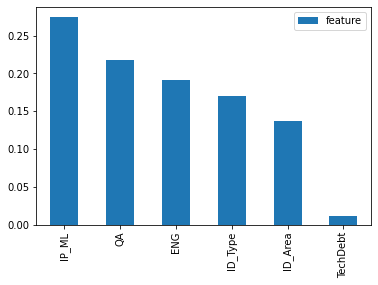

In [165]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

## d. Conclusion

Using Classification algorithms for regression problems is an option. However, when regression is required, there should be a linear correlation between variables. In this particular scenario, it's clear that independent and dependent variables are not lineary correlated, so regression is not an option, and using classification algorithms is not the exception. 

# 5 - Testing results

Testing results and comparing with real estimations. Conclusions about how powerful is to use an algorithm to predict effort for business requierements

In [180]:
# comparing results (Real versus prediction)
pred_test = pd.DataFrame(data=y_test_pred)
train_test = pd.DataFrame(data=y_train)
h_stack_test = pd.concat([train_test, pred_test], axis=1)
h_stack_test.columns = ['REAL','PRED'] 
h_stack_test
# final_result = h_stack_test.rename(columns={0: 'REAL', 0: 'PRED'})
# final_result

,REAL,PRED
0,1,6.20
1,8,4.54
2,0,6.75
3,5,4.82
4,5,6.75
...,...,...
375,8,nan
376,8,nan
377,5,nan
378,1,nan


### Results with AdaBoost, but similar to previous algorithms

In the table above, the column on the left is the real data and the right column is the prediction of the algorithm. Even sometimes the prediction gets really close to reality, measuring R2 is not reflecting how the algorithms is really perfoming due real observations are clearly a multiclass, and the prediction is a number inside the multiclass range (from 0 to 13). 

In the case of this project, this is a good result, those real observations in 0 are being predicted as more than 0 (Logically) and in the rest of the cases, the predictions are usually grather than the original estimations. 

Most of the times, business requirements take more time than estimated. This could be that the algorithm is detecting a pattern in the observations?

Next steps are to improve and validate that hypotesis, increasing the level of trust with the algorithm. 

In [193]:
pos_pred = 0
neg_pred = 0
comp = False

for i in range(0, len(pred_test)):

  comp = h_stack_test.iloc[i].REAL < h_stack_test.iloc[i].PRED

  if comp == True:
    #print(comp)
    pos_pred += 1
  else:
    #print(comp)
    neg_pred += 1


print('Predictions are higher than real estimation: ', pos_pred)
print('Predictions are lower than real estimation: ', neg_pred)

Predictions are higher than real estimation:  97
Predictions are lower than real estimation:  66
